In [10]:
%matplotlib inline
import symlib
import matplotlib.pyplot as plt
import numpy as np
import pynbody
import pyEXP

In [23]:
print("Checking main libraries in environment")
print(pynbody.__version__)
print(symlib.__package__)
print(pyEXP.__name__)

Checking main libraries in environment
1.6.0.post0
symlib
pyEXP


In [4]:
user = "guest"
password = "$YmPh0ny"

In [7]:
# The base directory where data will be downloaded to.
# All the suites and halos will be properly ordered
# within this, so each halo's location will end up being
# {data_dir}/{suite_name}/{halo_name}.
data_dir = "../../data/"

# The type of data you want to download. "halos" is
# the basic halo information associated with the
# central host, and "trees" is that plus the full
# merger tree of the simulation.
target = "halos"

# Exmaple 1
# Download the first host halo in the Milky Way-mass suite.
symlib.download_files(user, password, "MWest", 0,
        data_dir, target=target)

"""
# Example 2
# Download all the host halos in the Milky Way-mass suite.
symlib.download_files(user, password, "SymphonyMilkyWay", None,
        data_dir, target=target)

# Example 3
# Download all the host halos across all the suites.
symlib.download_files(user, password, None, None,
        data_dir, target=target)

# Example 4
# Download a specific halo that you know the name of.
symlib.download_files(user, password, "SymphonyMilkyWay", "Halo023",
        data_dir, target=target)
"""

Unpacking halo 0 in suite SymphonyMilkyWay to ../../data/


'\n# Example 2\n# Download all the host halos in the Milky Way-mass suite.\nsymlib.download_files(user, password, "SymphonyMilkyWay", None,\n        data_dir, target=target)\n\n# Example 3\n# Download all the host halos across all the suites.\nsymlib.download_files(user, password, None, None,\n        data_dir, target=target)\n\n# Example 4\n# Download a specific halo that you know the name of.\nsymlib.download_files(user, password, "SymphonyMilkyWay", "Halo023",\n        data_dir, target=target)\n'

In [24]:
sim_dir = "../../data/SymphonyMilkyWay/Halo023/"

params = symlib.simulation_parameters(sim_dir)
print(params)


{'flat': True, 'H0': 70.0, 'Om0': 0.286, 'Ob0': 0.049, 'sigma8': 0.82, 'ns': 0.95, 'eps': 0.17, 'mp': 281981.0, 'h100': 0.7}


(-600.0, 600.0)

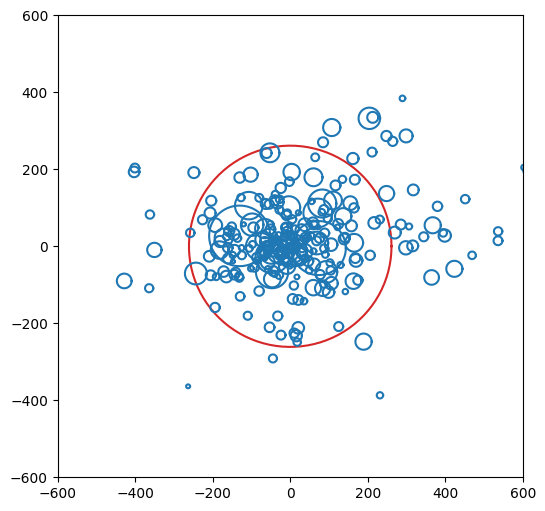

In [40]:
h, hist = symlib.read_subhalos(sim_dir)

fig, ax = plt.subplots(figsize=(6,6))
host = h[0,-5] # First halo, last snapshot.
symlib.plot_circle(ax, host["x"][0], host["x"][1],
                   host["rvir"], c="tab:red")

for i in range(1, len(h)):
    sub = h[i,-1] # i-th halo, last snapshot.
    if not sub["ok"]: continue
    symlib.plot_circle(
        ax, sub["x"][0], sub["x"][1],
        sub["rvir"], c="tab:blue"
    )
ax.set_xlim(-600,600)
ax.set_ylim(-600,600)

In [31]:
subh = symlib.read_subhalos(sim_dir)

In [36]:
subh[1]

array([(1.13728579e+12, 175.92,   0, 0.00000000e+00,       0,     236,  True, False, False,    -1,  -1,     0, False, 1.13728579e+12, 0, 0, 0, 0, 0, 0),
       (9.35428588e+10, 119.8 , 124, 3.75148803e-01,   41997,   42117,  True, False,  True,    -1, 124,  1271, False, 8.19285770e+10, 0, 0, 0, 0, 0, 0),
       (6.09285734e+10,  88.26, 154, 1.26646295e-01,  154797,  154958,  True, False,  True,    -1, 154,  4393, False, 6.09285734e+10, 0, 0, 0, 0, 0, 0),
       (3.52571433e+10,  64.86, 208, 3.31254005e-02,  948537,  948773,  True, False,  True,    -1, 208, 21957, False, 3.52571433e+10, 0, 0, 0, 0, 0, 0),
       (3.04285737e+10,  67.96, 229, 2.66089905e-02,  874230,  874466,  True, False,  True,    -1, 229, 20274, False, 3.04285737e+10, 0, 0, 0, 0, 0, 0),
       (2.95000003e+10,  73.71, 144, 8.60946774e-02,  135808,  135968,  True, False,  True,    -1, 144,  3851, False, 2.95000003e+10, 0, 0, 0, 0, 0, 0),
       (2.15000003e+10,  55.75, 171, 3.02048493e-02,  432189,  432378,  True, Fals

In [ ]:
## Physical units ? 

In [42]:

sim_dir = symlib.get_host_directory(
"my/halo/dir", "SymphonyMW", "Halo023")

# Read header data needed to fast particle reads
part = symlib.Particles(sim_dir)

# Read particle data for snapshot 199
p = part.read(199)

FileNotFoundError: The particle data for this halo does not exist.